In [ ]:
# Exporting the notebook. It may take several seconds....

[NbConvertApp] Converting notebook demo_predictive_maintenance_v1.ipynb to script
[NbConvertApp] Writing 9029 bytes to demo_predictive_maintenance_v1.py


matplotlib==3.0.2
seaborn==0.9.0
pandas==0.25.3
numpy==1.19.2
xprctl.egg==info
autofeat==1.1.3
keras==2.4.3
scikit_learn==0.23.2
tensorflow==2.3.1
xgboost==1.2.1


INFO: Successfully output requirements


## Data connection

In [1]:
# import required libraries
from xpresso.ai.core.data.automl import StructuredDataset

# create a structured dataset
my_dataset = StructuredDataset(dataset_name = "turbofan", project_name = "test_oct4", created_by = "rakesh.ranjan")

# set parameters for importing a local CSV file
data_config = {"type": "FS",
               "data_source": "Local",
               "options": {"sep": " ", "header": None},
               "path": "/home/jovyan/predictive_maintenance/train_FD001_exp.txt"}

# import data from a CSV file into the dataset
my_dataset.import_dataset(data_config)

# data variable of dataset is a pandas data frame
my_dataset.data.shape
data_frame = my_dataset.data.head()
data_frame


 setting vault_passwords



0   1       2       3      4       5       6        7        8      9   \
0   1   1 -0.0007 -0.0004  100.0  518.67  641.82  1589.70  1400.60  14.62   
1   1   2  0.0019 -0.0003  100.0  518.67  642.15  1591.82  1403.14  14.62   
2   1   3 -0.0043  0.0003  100.0  518.67  642.35  1587.99  1404.20  14.62   
3   1   4  0.0007  0.0000  100.0  518.67  642.35  1582.79  1401.87  14.62   
4   1   5 -0.0019 -0.0002  100.0  518.67  642.37  1582.85  1406.22  14.62   

   ...       18      19    20   21    22     23     24       25  26  27  
0  ...  8138.62  8.4195  0.03  392  2388  100.0  39.06  23.4190 NaN NaN  
1  ...  8131.49  8.4318  0.03  392  2388  100.0  39.00  23.4236 NaN NaN  
2  ...  8133.23  8.4178  0.03  390  2388  100.0  38.95  23.3442 NaN NaN  
3  ...  8133.83  8.3682  0.03  392  2388  100.0  38.88  23.3739 NaN NaN  
4  ...  8133.80  8.4294  0.03  393  2388  100.0  38.90  23.4044 NaN NaN  

[5 rows x 28 columns]

## Data preprocessing

In [2]:
my_dataset.data = my_dataset.data.drop(my_dataset.data.columns[[26, 27]], axis = 1) # dropping last two NaN columns
my_dataset.data.columns = ['id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3',
                     's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
                     's15', 's16', 's17', 's18', 's19', 's20', 's21']
my_dataset.data.head()

id  cycle  setting1  setting2  setting3      s1      s2       s3       s4  \
0   1      1   -0.0007   -0.0004     100.0  518.67  641.82  1589.70  1400.60   
1   1      2    0.0019   -0.0003     100.0  518.67  642.15  1591.82  1403.14   
2   1      3   -0.0043    0.0003     100.0  518.67  642.35  1587.99  1404.20   
3   1      4    0.0007    0.0000     100.0  518.67  642.35  1582.79  1401.87   
4   1      5   -0.0019   -0.0002     100.0  518.67  642.37  1582.85  1406.22   

      s5  ...     s12      s13      s14     s15   s16  s17   s18    s19  \
0  14.62  ...  521.66  2388.02  8138.62  8.4195  0.03  392  2388  100.0   
1  14.62  ...  522.28  2388.07  8131.49  8.4318  0.03  392  2388  100.0   
2  14.62  ...  522.42  2388.03  8133.23  8.4178  0.03  390  2388  100.0   
3  14.62  ...  522.86  2388.08  8133.83  8.3682  0.03  392  2388  100.0   
4  14.62  ...  522.19  2388.04  8133.80  8.4294  0.03  393  2388  100.0   

     s20      s21  
0  39.06  23.4190  
1  39.00  23.4236  
2  38.95  23.3442  
3  38.88  23.3739  
4  38.90  23.4044  

[5 rows x 26 columns]

## Versioning - Raw dataset

In [3]:
from xpresso.ai.core.data.versioning.controller_factory import VersionControllerFactory

# Create a Repo Manager object
repo_manager = VersionControllerFactory().get_version_controller()

In [5]:
# # A repository for the project would already have been created
# # create a branch within the repo
repo_manager.create_branch(repo_name="test_oct4", branch_name="turbofan_data", type="data")

In [4]:
# #push the dataset
repo_manager.push_dataset(repo_name="test_oct4", branch_name="turbofan_data",  
                          dataset=my_dataset, description="Version raw dataset", type="data")

pushing `test_oct4/datasets/turbofan/20201105_123843_turbofan_xpr_dataset__00001.json`; Size:452
100%|██████████| 1/1 [00:00<00:00,  7.04it/s]
pushing `test_oct4/datasets/turbofan/20201105_123843_turbofan_xpr_dataset__00001.json`; Size:452
pushing `test_oct4/datasets/turbofan/20201105_123842_turbofan_xpr_dataset__00001.csv`; Size:3395968
100%|██████████| 1/1 [00:00<00:00,  2.70it/s]
pushing `test_oct4/datasets/turbofan/20201105_123842_turbofan_xpr_dataset__00001.csv`; Size:3395968


(2, '/dataset/turbofan')

## Exploration

In [7]:
from xpresso.ai.core.data.exploration import Explorer

# create a data explorer
explorer = Explorer(my_dataset)

explorer.understand()
explorer.explore_univariate(verbose=True)
explorer.explore_multivariate(verbose=True)

100%|██████████| 26/26 [00:00<00:00, 1506.39it/s]


Starting Data Understanding:



Datatype
id        nominal
cycle     nominal
setting1  nominal
setting2  nominal
setting3  nominal
s1        nominal
s2        nominal
s3        numeric
s4        numeric
s5        nominal
s6        nominal
s7        nominal
s8        nominal
s9        numeric
s10       nominal
s11       nominal
s12       nominal
s13       nominal
s14       numeric
s15       numeric
s16       nominal
s17       nominal
s18       nominal
s19       nominal
s20       nominal
s21       numeric

 35%|███▍      | 9/26 [00:00<00:00, 70.35it/s]


Starting UniVariate Exploration:



100%|██████████| 26/26 [00:00<00:00, 75.59it/s]


Numeric Analysis:


NA Count     type NA %      min      max     Mean   Median  \
s3         0  numeric    0  1571.04  1616.91  1590.52   1590.1   
s4         0  numeric    0  1382.25  1441.49  1408.93  1408.04   
s9         0  numeric    0  9021.73  9244.59  9065.24  9060.66   
s14        0  numeric    0  8099.94  8293.72  8143.75  8140.54   
s15        0  numeric    0     8.32     8.58     8.44     8.44   
s21        0  numeric    0    22.89    23.62    23.29     23.3   

    Standard Deviation Variance     Mode  \
s3                6.13  37.5769   1590.1   
s4                   9       81  1409.01   
s9               22.08  487.526  9058.88   
s14              19.08  364.046  8138.89   
s15               0.04   0.0016     8.43   
s21               0.11   0.0121    23.32   

                                         Quartiles    iqr kurtosis skewness  \
s3    [1571.04, 1586.26, 1590.1, 1594.38, 1616.91]   8.12     0.01     0.31   
s4   [1382.25, 1402.36, 1408.04, 1414.55, 1441.49]  12.19    -0.16     0.44   
s9    [9021.73, 9053.1, 9060.66, 9069.42, 9244.59]  16.32     9.38     2.56   
s14  [8099.94, 8133.24, 8140.54, 8148.31, 8293.72]  15.07     8.85     2.37   
s15                 [8.32, 8.41, 8.44, 8.47, 8.58]   0.06    -0.12     0.39   
s21             [22.89, 23.22, 23.3, 23.37, 23.62]   0.15    -0.12    -0.35   

    Is Valid?  
s3       True  
s4       True  
s9       True  
s14      True  
s15      True  
s21      True


Categorical Analysis:


NA Count     type                                        Unique NA %  \
id              0  nominal                          [69, 92, 96, 67, 83]    0   
cycle           0  nominal                            [16, 40, 1, 17, 2]    0   
setting1        0  nominal        [0.0, 0.0002, 0.0004, -0.0005, 0.0001]    0   
setting2        0  nominal       [-0.0003, 0.0001, 0.0, 0.0003, -0.0004]    0   
setting3        0  nominal                                       [100.0]    0   
s1              0  nominal                                      [518.67]    0   
s2              0  nominal        [642.5, 642.56, 642.53, 642.6, 642.67]    0   
s5              0  nominal                                       [14.62]    0   
s6              0  nominal                                 [21.61, 21.6]    0   
s7              0  nominal      [553.62, 553.76, 553.94, 553.72, 553.43]    0   
s8              0  nominal  [2388.11, 2388.1, 2388.09, 2388.08, 2388.07]    0   
s10             0  nominal                                         [1.3]    0   
s11             0  nominal           [47.46, 47.57, 47.45, 47.49, 47.47]    0   
s12             0  nominal      [521.63, 521.42, 521.35, 521.56, 521.66]    0   
s13             0  nominal  [2388.1, 2388.09, 2388.08, 2388.11, 2388.07]    0   
s16             0  nominal                                        [0.03]    0   
s17             0  nominal                     [393, 392, 394, 395, 391]    0   
s18             0  nominal                                        [2388]    0   
s19             0  nominal                                       [100.0]    0   
s20             0  nominal           [38.86, 38.89, 38.82, 38.87, 38.85]    0   

             Mode  
id             69  
cycle           1  
setting1        0  
setting2  -0.0003  
setting3      100  
s1         518.67  
s2          642.5  
s5          14.62  
s6          21.61  
s7         553.62  
s8        2388.11  
s10           1.3  
s11         47.46  
s12        521.63  
s13        2388.1  
s16          0.03  
s17           393  
s18          2388  
s19           100  
s20         38.86

Starting Multivariate Exploration:

0


100%|██████████| 400/400 [01:31<00:00,  4.35it/s]

pearson Analysis


s14   s15   s21    s3    s4    s9
s14  1.00  0.19 -0.19  0.24  0.19  0.96
s15  0.19  1.00 -0.70  0.64  0.76  0.29
s21 -0.19 -0.70  1.00 -0.63 -0.75 -0.29
s3   0.24  0.64 -0.63  1.00  0.68  0.32
s4   0.19  0.76 -0.75  0.68  1.00  0.30
s9   0.96  0.29 -0.29  0.32  0.30  1.00

spearman Analysis


s14   s15   s21    s3    s4    s9
s14  1.00 -0.02  0.02  0.03 -0.04  0.89
s15 -0.02  1.00 -0.68  0.61  0.73  0.11
s21  0.02 -0.68  1.00 -0.61 -0.72 -0.11
s3   0.03  0.61 -0.61  1.00  0.65  0.14
s4  -0.04  0.73 -0.72  0.65  1.00  0.11
s9   0.89  0.11 -0.11  0.14  0.11  1.00

chi_square Analysis


cycle    id   s1  s10  s11   s12   s13  s16   s17  s18  s19    s2  \
cycle      0.00  1.00  1.0  1.0  0.0  0.00  0.00  1.0  0.00  1.0  1.0  0.00   
id         1.00  0.00  1.0  1.0  0.0  0.00  0.00  1.0  0.00  1.0  1.0  0.00   
s1         1.00  1.00  1.0  1.0  1.0  1.00  1.00  1.0  1.00  1.0  1.0  1.00   
s10        1.00  1.00  1.0  1.0  1.0  1.00  1.00  1.0  1.00  1.0  1.0  1.00   
s11        0.00  0.00  1.0  1.0  0.0  0.00  0.00  1.0  0.00  1.0  1.0  0.00   
s12        0.00  0.00  1.0  1.0  0.0  0.00  0.00  1.0  0.00  1.0  1.0  0.00   
s13        0.00  0.00  1.0  1.0  0.0  0.00  0.00  1.0  0.00  1.0  1.0  0.00   
s16        1.00  1.00  1.0  1.0  1.0  1.00  1.00  1.0  1.00  1.0  1.0  1.00   
s17        0.00  0.00  1.0  1.0  0.0  0.00  0.00  1.0  0.00  1.0  1.0  0.00   
s18        1.00  1.00  1.0  1.0  1.0  1.00  1.00  1.0  1.00  1.0  1.0  1.00   
s19        1.00  1.00  1.0  1.0  1.0  1.00  1.00  1.0  1.00  1.0  1.0  1.00   
s2         0.00  0.00  1.0  1.0  0.0  0.00  0.00  1.0  0.00  1.0  1.0  0.00   
s20        0.00  0.00  1.0  1.0  0.0  0.00  0.00  1.0  0.00  1.0  1.0  0.00   
s5         1.00  1.00  1.0  1.0  1.0  1.00  1.00  1.0  1.00  1.0  1.0  1.00   
s6         0.00  0.00  1.0  1.0  0.0  0.00  0.00  1.0  0.00  1.0  1.0  0.00   
s7         0.00  0.00  1.0  1.0  0.0  0.00  0.00  1.0  0.00  1.0  1.0  0.00   
s8         0.00  0.00  1.0  1.0  0.0  0.00  0.00  1.0  0.00  1.0  1.0  0.00   
setting1   1.00  0.14  1.0  1.0  0.0  0.00  1.00  1.0  0.20  1.0  1.0  0.00   
setting2   0.96  0.00  1.0  1.0  0.0  0.23  0.72  1.0  0.86  1.0  1.0  0.96   
setting3   1.00  1.00  1.0  1.0  1.0  1.00  1.00  1.0  1.00  1.0  1.0  1.00   

          s20   s5    s6    s7    s8  setting1  setting2  setting3  
cycle     0.0  1.0  0.00  0.00  0.00      1.00      0.96       1.0  
id        0.0  1.0  0.00  0.00  0.00      0.14      0.00       1.0  
s1        1.0  1.0  1.00  1.00  1.00      1.00      1.00       1.0  
s10       1.0  1.0  1.00  1.00  1.00      1.00      1.00       1.0  
s11       0.0  1.0  0.00  0.00  0.00      0.00      0.00       1.0  
s12       0.0  1.0  0.00  0.00  0.00      0.00      0.23       1.0  
s13       0.0  1.0  0.00  0.00  0.00      1.00      0.72       1.0  
s16       1.0  1.0  1.00  1.00  1.00      1.00      1.00       1.0  
s17       0.0  1.0  0.00  0.00  0.00      0.20      0.86       1.0  
s18       1.0  1.0  1.00  1.00  1.00      1.00      1.00       1.0  
s19       1.0  1.0  1.00  1.00  1.00      1.00      1.00       1.0  
s2        0.0  1.0  0.00  0.00  0.00      0.00      0.96       1.0  
s20       0.0  1.0  0.00  0.00  0.00      0.00      0.10       1.0  
s5        1.0  1.0  1.00  1.00  1.00      1.00      1.00       1.0  
s6        0.0  1.0  0.00  0.00  0.00      0.84      0.53       1.0  
s7        0.0  1.0  0.00  0.00  0.00      0.00      0.97       1.0  
s8        0.0  1.0  0.00  0.00  0.00      0.99      0.82       1.0  
setting1  0.0  1.0  0.84  0.00  0.99      0.00      0.84       1.0  
setting2  0.1  1.0  0.53  0.97  0.82      0.84      0.00       1.0  
setting3  1.0  1.0  1.00  1.00  1.00      1.00      1.00       1.0

## Visualization - report generation

In [ ]:
#import required libraries
from xpresso.ai.core.data.visualization import Visualization

#instantiate a Visualization object
visualizer = Visualization.get_visualizer(my_dataset)

In [ ]:
visualizer.render_all(report=True)

## ML pipeline code (auto-project)

## data_fetch

In [11]:
## $xpr_param_component_name = data_fetch
## $xpr_param_component_type = pipeline_job

In [28]:
import os
#import pandas as pd
import pandas
#import numpy as np
import numpy 
import matplotlib
import tensorflow
#import matplotlib.pyplot as plt
import matplotlib.pyplot
#import seaborn as sns
import seaborn
import autofeat
from autofeat import FeatureSelector, AutoFeatRegressor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler, QuantileTransformer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV

import keras
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

import warnings
warnings.filterwarnings("ignore")

## data_prep

In [13]:
## $xpr_param_component_name = data_prep
## $xpr_param_component_type = pipeline_job
## $xpr_param_global_variables = ["train_file", "df_initial", "df_cleaned"]

In [29]:
path = "/data/turbofan"
#path = "/home/jovyan/predictive_maintenance/pipelines/pm-pipeline"
train_files = ['train_FD001.txt']
train_file = train_files[0]

In [30]:
def data_extraction(file):
    import pandas
    df = pandas.read_csv(os.path.join(path, file), sep = ' ', header = None)
    print("Shape of training data: ",df.shape)
    return df

In [31]:
def data_cleaning(dataframe):
    dataframe_modified = dataframe.drop(dataframe.columns[[26, 27]], axis = 1) # dropping last two NaN columns
    dataframe_modified.columns = ['id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3',
                     's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
                     's15', 's16', 's17', 's18', 's19', 's20', 's21']
    
    # Calculating the RUL (Remaining Useful Life) for each id
    rul = pandas.DataFrame(dataframe_modified.groupby('id')['cycle'].max()).reset_index() # max cycles for each id
    rul.columns = ['id', 'maxCycles'] 
    train_df = dataframe_modified.merge(rul, on=['id'], how='left') 
    train_df['RUL'] = train_df['maxCycles'] - train_df['cycle']
    train_df.drop('maxCycles', axis=1, inplace=True) 
    return train_df

In [32]:
# Extracting data
df_initial = data_extraction(train_file)

Shape of training data:  (20631, 28)


In [33]:
# Removing columns with NaN and adding the RUL column
df_cleaned = data_cleaning(df_initial)
df_cleaned

id  cycle  setting1  setting2  setting3      s1      s2       s3  \
0        1      1   -0.0007   -0.0004     100.0  518.67  641.82  1589.70   
1        1      2    0.0019   -0.0003     100.0  518.67  642.15  1591.82   
2        1      3   -0.0043    0.0003     100.0  518.67  642.35  1587.99   
3        1      4    0.0007    0.0000     100.0  518.67  642.35  1582.79   
4        1      5   -0.0019   -0.0002     100.0  518.67  642.37  1582.85   
...    ...    ...       ...       ...       ...     ...     ...      ...   
20626  100    196   -0.0004   -0.0003     100.0  518.67  643.49  1597.98   
20627  100    197   -0.0016   -0.0005     100.0  518.67  643.54  1604.50   
20628  100    198    0.0004    0.0000     100.0  518.67  643.42  1602.46   
20629  100    199   -0.0011    0.0003     100.0  518.67  643.23  1605.26   
20630  100    200   -0.0032   -0.0005     100.0  518.67  643.85  1600.38   

            s4     s5  ...      s13      s14     s15   s16  s17   s18    s19  \
0      1400.60  14.62  ...  2388.02  8138.62  8.4195  0.03  392  2388  100.0   
1      1403.14  14.62  ...  2388.07  8131.49  8.4318  0.03  392  2388  100.0   
2      1404.20  14.62  ...  2388.03  8133.23  8.4178  0.03  390  2388  100.0   
3      1401.87  14.62  ...  2388.08  8133.83  8.3682  0.03  392  2388  100.0   
4      1406.22  14.62  ...  2388.04  8133.80  8.4294  0.03  393  2388  100.0   
...        ...    ...  ...      ...      ...     ...   ...  ...   ...    ...   
20626  1428.63  14.62  ...  2388.26  8137.60  8.4956  0.03  397  2388  100.0   
20627  1433.58  14.62  ...  2388.22  8136.50  8.5139  0.03  395  2388  100.0   
20628  1428.18  14.62  ...  2388.24  8141.05  8.5646  0.03  398  2388  100.0   
20629  1426.53  14.62  ...  2388.23  8139.29  8.5389  0.03  395  2388  100.0   
20630  1432.14  14.62  ...  2388.26  8137.33  8.5036  0.03  396  2388  100.0   

         s20      s21  RUL  
0      39.06  23.4190  191  
1      39.00  23.4236  190  
2      38.95  23.3442  189  
3      38.88  23.3739  188  
4      38.90  23.4044  187  
...      ...      ...  ...  
20626  38.49  22.9735    4  
20627  38.30  23.1594    3  
20628  38.44  22.9333    2  
20629  38.29  23.0640    1  
20630  38.37  23.0522    0  

[20631 rows x 27 columns]

## feature_engineering

In [34]:
## $xpr_param_component_name = feature_engineering
## $xpr_param_component_type = pipeline_job
## $xpr_param_global_variables = ["train_file", "df_initial", "df_cleaned","X_train_transformed","X_test_transformed", "y_train", "y_test"]

In [35]:
def create_training_and_test_data(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
    return X_train, X_test, y_train, y_test

In [36]:
def normalization(X_train, X_test):
    scaler = QuantileTransformer(n_quantiles=10, output_distribution='normal')
    X_train_normalized = scaler.fit_transform(X_train)
    X_test_normalized = scaler.transform(X_test)
    return X_train_normalized, X_test_normalized

In [37]:
def feature_engineering(dataframe):
    dataframe_description = dataframe.describe()
    df_plot = dataframe.copy()
    df_corr = df_plot.corr(method='pearson')
    fig, ax = matplotlib.pyplot.subplots(figsize=(10,10))
    axes = seaborn.heatmap(df_corr, linewidths=.2)
    axes = dataframe_description.T.plot.bar(subplots=True, figsize=(20,15))
    data = dataframe.drop(['cycle','id'], axis=1)
    
    X = (data.iloc[:,:-1]).to_numpy()
    y = (data.iloc[:,-1]).to_numpy()
    
    #Creating training and test data
    X_train, X_test, y_train, y_test = create_training_and_test_data(X, y)
    
    #Normalizing train and test data
    X_train_normalized, X_test_normalized = normalization(X_train, X_test)
    
    #Feature Engineering using autofeat
    afreg = AutoFeatRegressor(verbose=1, feateng_steps = 1, featsel_runs = 1)
    X_train_transformed = afreg.fit_transform(X_train_normalized, y_train)
    X_test_transformed = afreg.transform(X_test_normalized)
    print("R^2 after feature engineering: %.4f" % afreg.score(X_test_transformed, y_test))  
    X_train_transformed = X_train_transformed.to_numpy()
    X_test_transformed = X_test_transformed.to_numpy()
    return X_train_transformed, X_test_transformed, y_train, y_test

[AutoFeat] The 1 step feature engineering process could generate up to 168 features.
[AutoFeat] With 16504 data points this new feature matrix would use about 0.01 gb of space.
[feateng] Step 1: transformation of original features
[feateng] Generated 74 transformed features from 24 original features - done.
[feateng] Generated altogether 74 new features in 1 steps
[feateng] Removing correlated features, as well as additions at the highest level
[feateng] Generated a total of 74 additional features
[featsel] Scaling data...done.
[featsel] Feature selection run 1/1
[featsel] 16 features after 1 feature selection runs
[featsel] 16 features after correlation filtering
[featsel] 15 features after noise filtering
[AutoFeat] Computing 3 new features.
[AutoFeat]     3/    3 new features ...done.
[AutoFeat] Final dataframe with 27 feature columns (3 new).
[AutoFeat] Training final regression model.
[AutoFeat] Trained model: largest coefficients:
124.82690407986628
-12.416383 * x013
-10.428244 *

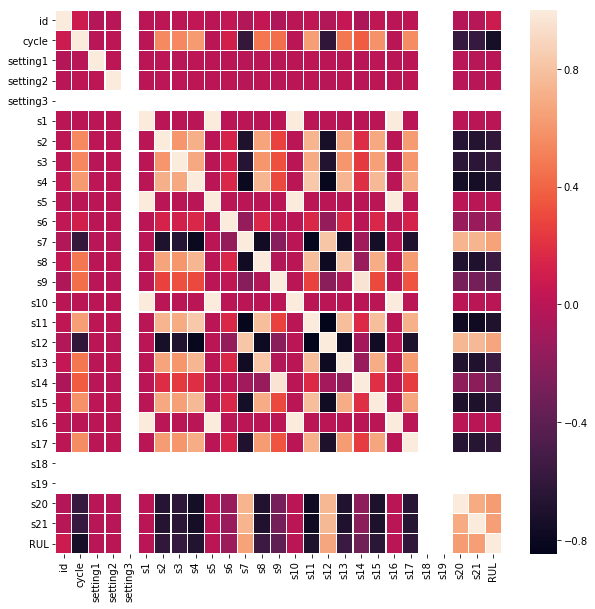

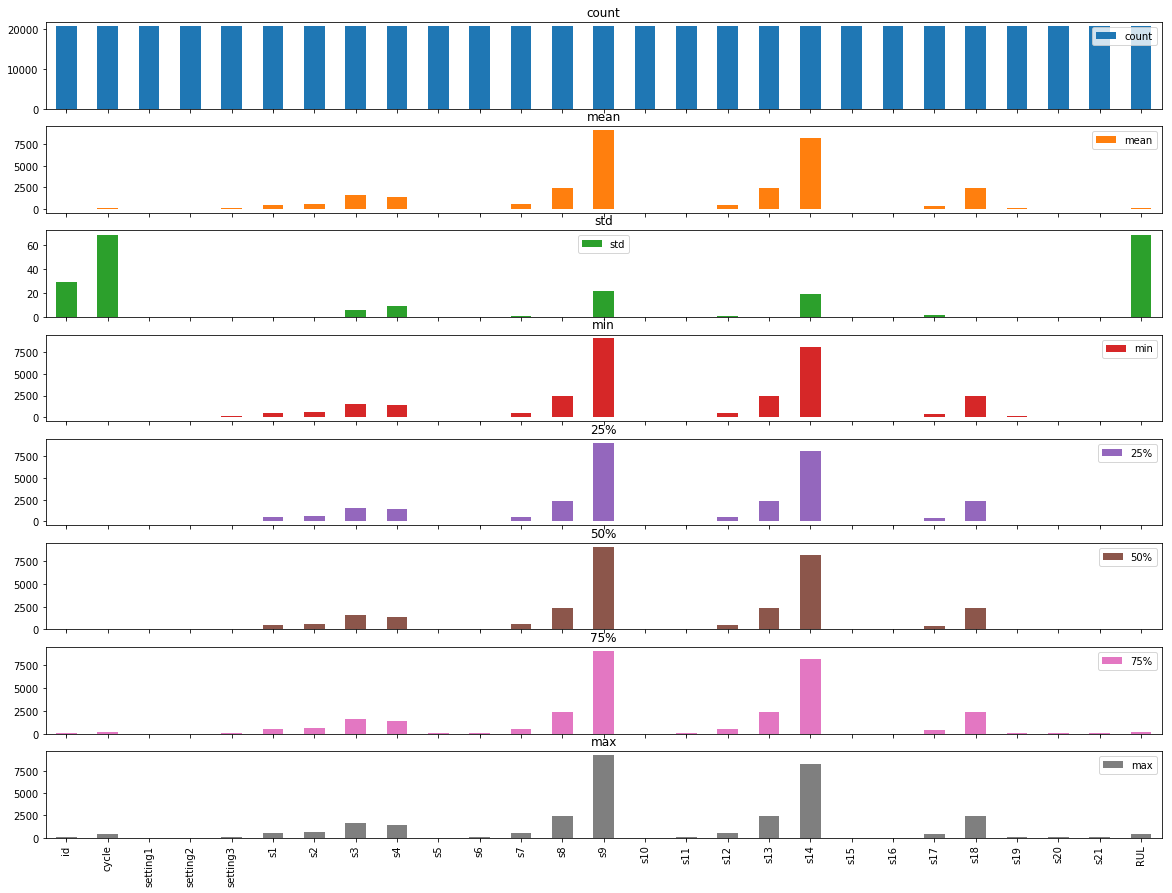

In [38]:
# Train-test split, normalization and feature engineering
X_train_transformed, X_test_transformed, y_train, y_test = feature_engineering(df_cleaned)

## Training

In [104]:
## $xpr_param_component_name = training
## $xpr_param_component_type = pipeline_job
## $xpr_param_global_variables = ["train_file", "df_initial", "df_cleaned","X_train_transformed","X_test_transformed", "y_train", "y_test"]

In [39]:
def LSTM_model(X_train_normalized, y_train, X_test_normalized, y_test, epochs):
    # Defining a 2-layer stacked LSTM
    X_train_lstm = numpy.reshape(X_train_normalized,(X_train_normalized.shape[0],1,-1)) 
    print("Shape of X_train = "+str(X_train_lstm.shape))
    X_test_lstm = numpy.reshape(X_test_normalized,(X_test_normalized.shape[0],1,-1))
    print("Shape of X_train = "+str(X_test_lstm.shape))#
    model = Sequential()
    model.add(LSTM(32, activation='relu', input_shape=(1, X_train_normalized.shape[1]), return_sequences = True))
    model.add(LSTM(32, activation='relu', input_shape=(1, X_train_normalized.shape[1])))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    history = model.fit(X_train_lstm, y_train, epochs=epochs, validation_split=0.20)
    y_train_pred_lstm = model.predict(X_train_lstm)
    y_test_pred_lstm = model.predict(X_test_lstm)
    R2_test_lstm = r2_score(y_test_pred_lstm, y_test)
    R2_train_lstm = r2_score(y_train_pred_lstm,y_train)
    print("\nR2 Score on the test dataset with LSTM = " + str(R2_test_lstm))
    #model.save("Model/lstm_model")
    #reconstructed_model = keras.models.load_model("Model/lstm_model")
    return (history, model, R2_test_lstm, R2_train_lstm)

In [40]:
epochs=2

In [41]:
# Fitting LSTM model
print("2. Using LSTM:\n")
history, model, R2_test_lstm, R2_train_lstm = LSTM_model(X_train_transformed, y_train, X_test_transformed, y_test, epochs)

2. Using LSTM:

Shape of X_train = (16504, 1, 27)
Shape of X_train = (4127, 1, 27)
Epoch 1/2
413/413 [==============================] - 2s 4ms/step - loss: 4731.0688 - val_loss: 1740.6782
Epoch 2/2
413/413 [==============================] - 1s 3ms/step - loss: 1765.9438 - val_loss: 1700.3214

R2 Score on the test dataset with LSTM = 0.4480998058091762


In [42]:
if not os.path.exists("/output"):
    os.makedirs("/output")

In [182]:
model.save(os.path.join("/output", 'saved_model.h5'))